# Lead Score Case Study
Members:
- Simranjeet Singh
- Kartik Mehra

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

from sklearn.feature_selection import RFE

pd.options.display.max_columns = None
pd.options.display.max_rows = 500

# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')



In [2]:
#creating var for np.nan
nan= np.nan

In [3]:
#loading the data
lead_data = pd.read_csv('Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
(lead_data=='Select').sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

__In our data we have multiple values as Select which is kind of missing data so we wil replace it with NaN__

In [5]:
lead_data.replace('Select',nan,inplace=True)

In [6]:
(lead_data=='Select').sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [7]:
lead_data.shape

(9240, 37)

In [8]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
lead_data.describe(include="all")

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,5860,1990,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,2385,5571,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,18,9,6,3,2,1,2,2,2,2,2,1,26,5,1,1,5,6,3,3,NaN,NaN,1,2,16
top,50b65bfe-d64f-41d2-bf9a-fe1442f15f60,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Finance Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,976,808,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,1613,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [10]:
#Checking of duplicate data in Prospect Id
lead_data['Prospect ID'].nunique() == lead_data.shape[0]


True

In [11]:
#Checking of duplicate data in  Lead Number
lead_data['Lead Number'].nunique() == lead_data.shape[0]


True

In [12]:
# #Converting 'Select' values to NaN.

# leads = leads.replace('Select', np.nan)

In [13]:
lead_data.drop(['Prospect ID','Lead Number'],axis=1,inplace=True) # because it is and id and it is not reqired in the analysis

## Checking null values in the dataset

In [14]:
def calc_null(df):
    return round((df.isnull().sum()/df.shape[0])*100,3)

In [15]:
calc_null(lead_data)

Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Country                                          26.634
Specialization                                   36.580
How did you hear about X Education               78.463
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                          0.000
Newspaper Article                                 0.000
X Education Forums                              

#### We will remove the columns that has null values more than 40%

In [16]:
lead_data = lead_data.loc[:,~(lead_data.isnull().sum()/lead_data.shape[0]>0.40)]

In [17]:
calc_null(lead_data)

Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Country                                          26.634
Specialization                                   36.580
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                          0.000
Newspaper Article                                 0.000
X Education Forums                                0.000
Newspaper                                       

In [18]:
lead_data.describe(include='all')

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,5860,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,9240,9240,5571,9240,9240,9240
unique,5,21,2,2,NaN,NaN,NaN,NaN,17,38,18,6,3,2,1,2,2,2,2,2,1,26,1,1,6,1,2,16
top,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified
freq,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,976,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,9240,9240,3222,9240,6352,3407
mean,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#changing the style of the graphs
sns.set_style("darkgrid")

### Analysing "Country" column

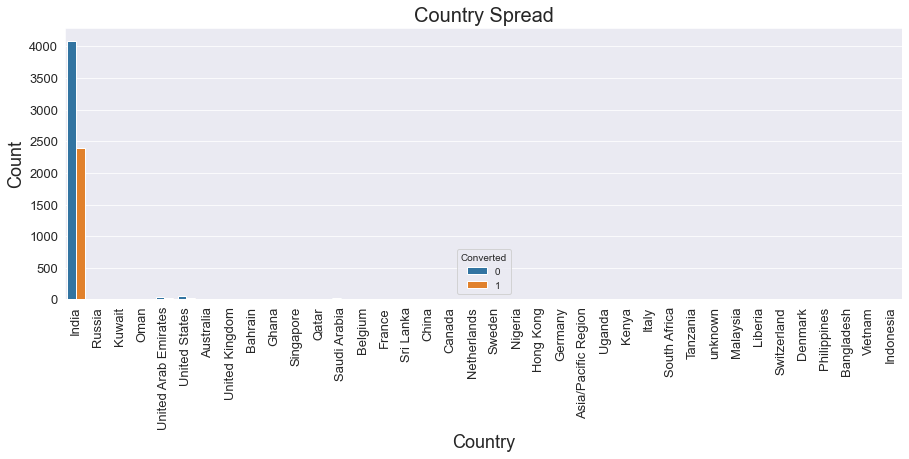

In [20]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
plt_obj=sns.countplot(lead_data.Country, hue=lead_data.Converted)
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Country',fontsize = 18)
plt.ylabel('Count',fontsize = 18)
plt.title('Country Spread',fontsize=20)
plt.show()

In [21]:
lead_data.Country.value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Germany                 0.000590
Canada                  0.000590
Kuwait                  0.000590
Nigeria                 0.000590
Sweden                  0.000443
Philippines             0.000295
China                   0.000295
Belgium                 0.000295
Ghana                   0.000295
Bangladesh              0.000295
Italy                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Netherlands             0.000295
Indonesia               0.000148
Vietnam                 0.000148
Switzerlan

In [22]:
#replacing the nan value with India
lead_data.Country.replace(nan,'India',inplace=True)

__Since max leads (approx. 95%) belongs to India so we will drop this column__

## Analysing the "City" column

In [23]:
lead_data.City.value_counts(normalize=True,dropna=False)*100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [24]:
# maximum value count is for mumbai. So, we will replace the nan values with mumbai
lead_data.City = lead_data.City.replace(nan,'Mumbai')

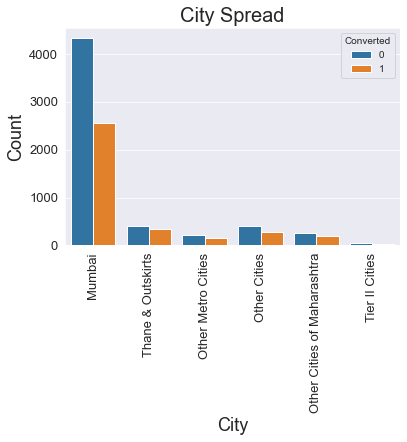

In [25]:
# ploting the graph for city
plt_obj=sns.countplot(lead_data.City, hue=lead_data.Converted)
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('City',fontsize = 18)
plt.ylabel('Count',fontsize = 18)
plt.title('City Spread',fontsize=20)
plt.show()

## Analysing "What is your current occupation" column

In [26]:
#What is your current occupation

lead_data['What is your current occupation'].value_counts(normalize=True,dropna=False)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [27]:
#replacing nan with Unemployed
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(nan,'Unemployed') 

In [28]:
lead_data['What is your current occupation'].value_counts(normalize=True,dropna=False)*100

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

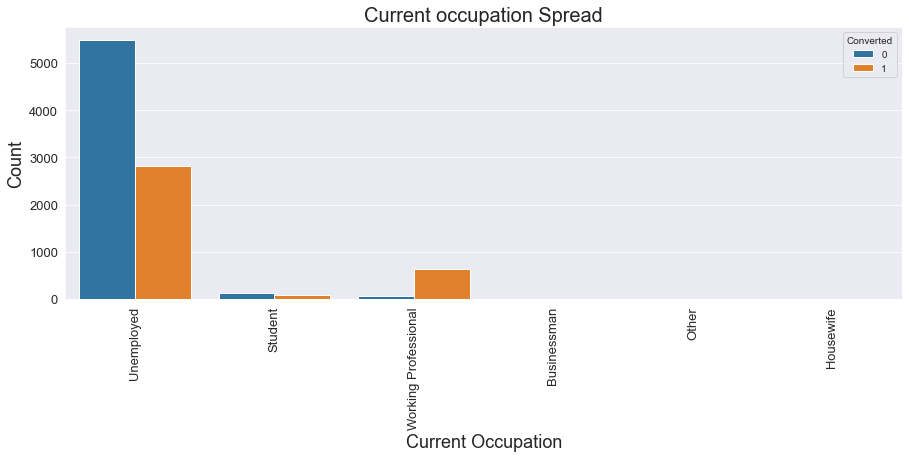

In [29]:
plt.figure(figsize=(15,5))
plt_obj=sns.countplot(lead_data['What is your current occupation'], hue=lead_data.Converted)
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Current Occupation',fontsize = 18)
plt.ylabel('Count',fontsize = 18)
plt.title('Current occupation Spread',fontsize=20)
plt.show()

- Working Professionals have high chance of conversion
- Unemployed sector has more initial leads but has less conversation rate i.e., approx. 50%

## Analysing "Specialization" column

In [30]:
lead_data.Specialization.value_counts(normalize=True,dropna=False)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

__Here we have 36% of missing data but not any value is highly frequent so we will create another value for this N/A__

In [31]:
lead_data.Specialization = lead_data.Specialization.replace(nan,'Not Available')

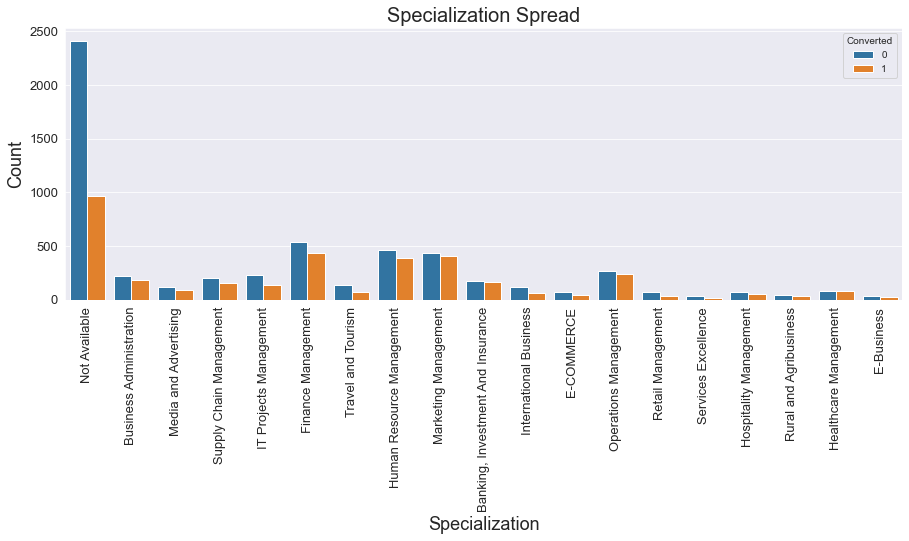

In [32]:
plt.figure(figsize=(15,5))
plt_obj=sns.countplot(lead_data.Specialization, hue=lead_data.Converted)
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Specialization',fontsize = 18)
plt.ylabel('Count',fontsize = 18)
plt.title('Specialization Spread',fontsize=20)

plt.show()

__We will merge the values which have term Management because they have higher number of lead conversion as compared to other specialisation__

In [33]:
lead_data['Specialization'] = lead_data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Specializations_In_Management')  

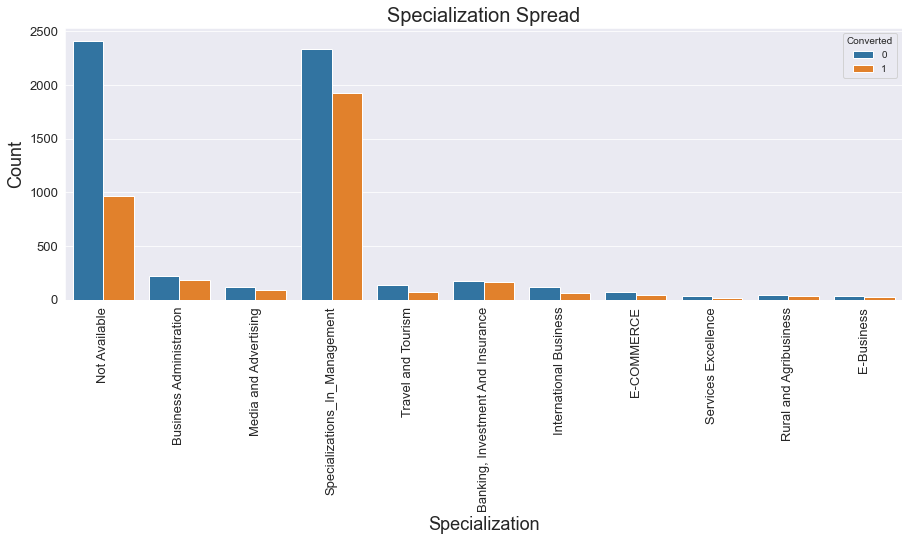

In [34]:
plt.figure(figsize=(15,5))
plt_obj=sns.countplot(lead_data.Specialization, hue=lead_data.Converted)
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Specialization',fontsize = 18)
plt.ylabel('Count',fontsize = 18)
plt.title('Specialization Spread',fontsize=20)
plt.show()

In [35]:
lead_data.Specialization.value_counts(normalize=True,dropna=False)*100

Specializations_In_Management        46.028139
Not Available                        36.580087
Business Administration               4.361472
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
E-COMMERCE                            1.212121
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

## Analysing "What matters most to you in choosing a course" column

In [36]:
lead_data['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [37]:
# replacing nan by Better Career Prospects
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].replace(nan,'Better Career Prospects') 

In [38]:
lead_data['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)*100

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

## Analysing "Lead Source Variable" column

In [39]:
lead_data['Lead Source'].value_counts(dropna=False,normalize=True)*100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Live Chat             0.021645
Press_Release         0.021645
Social Media          0.021645
testone               0.010823
blog                  0.010823
welearnblog_Home      0.010823
NC_EDM                0.010823
Pay per Click Ads     0.010823
WeLearn               0.010823
youtubechannel        0.010823
Name: Lead Source, dtype: float64

In [40]:
lead_data['Lead Source'].replace(nan,'Not Available',inplace=True)

#google replaced by Google
lead_data['Lead Source'].replace('google','Google',inplace=True)

#Facebook is a social media so we are replacing Facebook with Social Media
lead_data['Lead Source'].replace('Facebook','Social Media',inplace=True)



In [41]:
lead_data['Lead Source'].value_counts(dropna=False,normalize=True)*100

Google               31.093074
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Social Media          0.616883
Not Available         0.389610
bing                  0.064935
Click2call            0.043290
Live Chat             0.021645
Press_Release         0.021645
testone               0.010823
blog                  0.010823
welearnblog_Home      0.010823
NC_EDM                0.010823
Pay per Click Ads     0.010823
WeLearn               0.010823
youtubechannel        0.010823
Name: Lead Source, dtype: float64

In [42]:
frq = lead_data['Lead Source'].value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<=0.1).dropna()
frq

bing                 0.064935
Click2call           0.043290
Live Chat            0.021645
Press_Release        0.021645
testone              0.010823
blog                 0.010823
welearnblog_Home     0.010823
NC_EDM               0.010823
Pay per Click Ads    0.010823
WeLearn              0.010823
youtubechannel       0.010823
Name: Lead Source, dtype: float64

In [43]:
#variable having values less than 0.1% are getting replaced by Others
lead_data['Lead Source'].replace(frq.index,'Others',inplace=True)    

In [44]:
lead_data['Lead Source'].value_counts(dropna=False,normalize=True)*100

Google              31.093074
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Social Media         0.616883
Not Available        0.389610
Others               0.227273
Name: Lead Source, dtype: float64

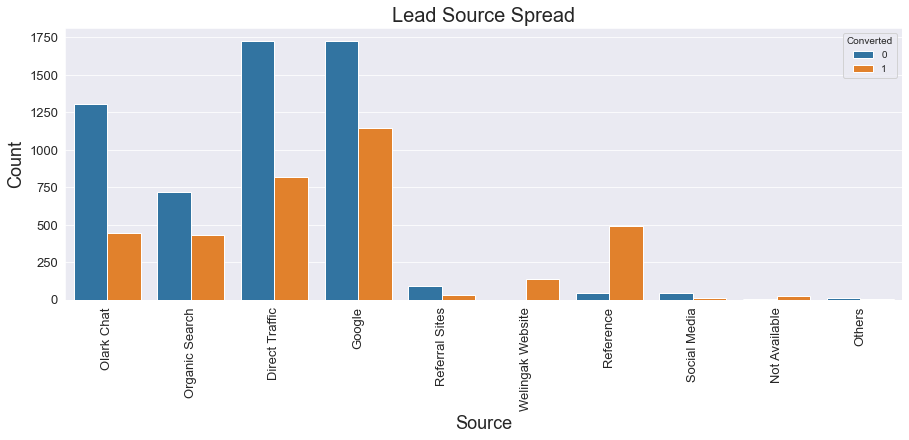

In [45]:

plt.figure(figsize=(15,5))
plt_obj=sns.countplot(lead_data['Lead Source'], hue=lead_data.Converted)
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)

plt.yticks(fontsize=13)
plt.xlabel('Source',fontsize = 18)
plt.ylabel('Count',fontsize = 18)
plt.title('Lead Source Spread',fontsize=20)

plt.show()

1. Maximum number of leads are generated by Google and Direct traffic.
2. Conversion Rate of reference leads and leads through welingak website is high than other sources.

## Analysing "Tags" column

In [46]:
lead_data.Tags.value_counts(normalize=True,dropna=False)*100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

__Here we have 36% of missing data but not any value is highly frequent so we will create another value for this N/A__

In [47]:
lead_data.Tags = lead_data.Tags.replace(nan,'Not Available') 

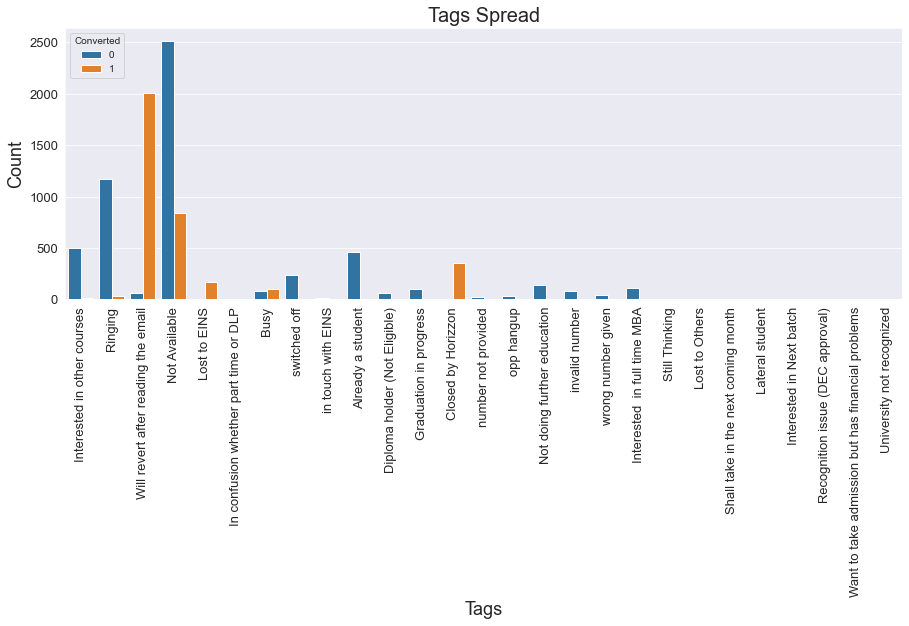

In [48]:
plt.figure(figsize=(15,5))
plt_obj=sns.countplot(lead_data.Tags, hue=lead_data.Converted)
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)

plt.yticks(fontsize=13)
plt.xlabel('Tags',fontsize = 18)
plt.ylabel('Count',fontsize = 18)
plt.title('Tags Spread',fontsize=20)

plt.show()

In [49]:
frq = lead_data.Tags.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<=5).dropna()
frq

Closed by Horizzon                                   3.874459
switched off                                         2.597403
Busy                                                 2.012987
Lost to EINS                                         1.893939
Not doing further education                          1.569264
Interested  in full time MBA                         1.266234
Graduation in progress                               1.201299
invalid number                                       0.898268
Diploma holder (Not Eligible)                        0.681818
wrong number given                                   0.508658
opp hangup                                           0.357143
number not provided                                  0.292208
in touch with EINS                                   0.129870
Lost to Others                                       0.075758
Want to take admission but has financial problems    0.064935
Still Thinking                                       0.064935
In confu

__There are alot of low frequency data so we will group them into one category named Others__

In [50]:
lead_data.Tags = lead_data.Tags.replace(frq.index,'Others')

In [51]:
lead_data.Tags.value_counts(normalize=True,dropna=False)*100

Not Available                          36.287879
Will revert after reading the email    22.424242
Others                                 17.683983
Ringing                                13.019481
Interested in other courses             5.551948
Already a student                       5.032468
Name: Tags, dtype: float64

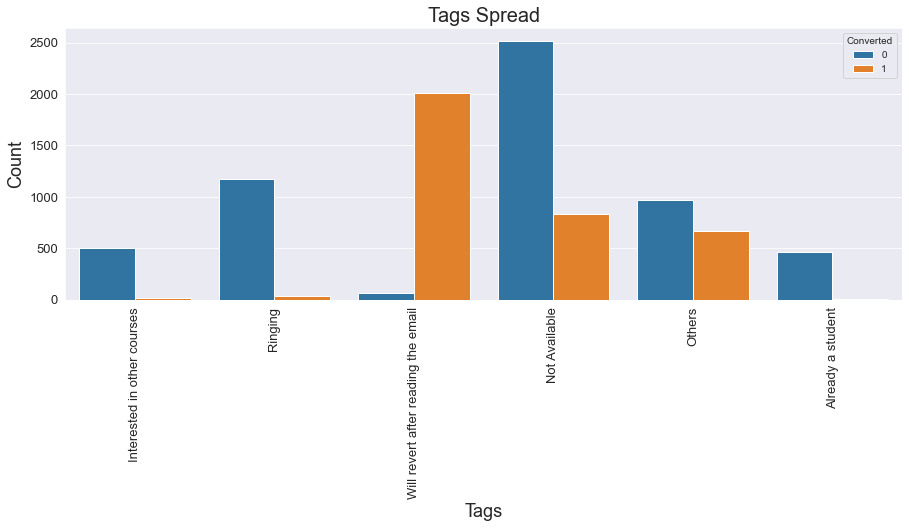

In [52]:
plt.figure(figsize=(15,5))
plt_obj=sns.countplot(lead_data.Tags, hue=lead_data.Converted)
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)

plt.yticks(fontsize=13)
plt.xlabel('Tags',fontsize = 18)
plt.ylabel('Count',fontsize = 18)
plt.title('Tags Spread',fontsize=20)

plt.show()

- Customer who said will revert after reading email have very high conversion rate
- Those who are already a student have approx. 0 conversion rate
- Ringing activity has very low conversion rate, maybe they are avoiding calls
- Those who are interested in other courses have very low conversion rate

## Analysing "Last Activity" column

In [53]:
lead_data['Last Activity'].value_counts(dropna=False,normalize=True)*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Marked Spam                0.021645
Email Received                   0.021645
Resubscribed to emails           0.010823
Visited Booth in Tradeshow       0.010823
Name: Last Activity, dtype: float64

In [54]:
frq = lead_data['Last Activity'].value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<=1.2).dropna()
frq

NaN                             1.114719
Unreachable                     1.006494
Unsubscribed                    0.660173
Had a Phone Conversation        0.324675
Approached upfront              0.097403
View in browser link Clicked    0.064935
Email Marked Spam               0.021645
Email Received                  0.021645
Resubscribed to emails          0.010823
Visited Booth in Tradeshow      0.010823
Name: Last Activity, dtype: float64

In [55]:
lead_data['Last Activity'].replace(frq.index,'Others',inplace=True)

In [56]:
lead_data['Last Activity'].value_counts(dropna=False,normalize=True)*100

Email Opened                 37.196970
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Others                        3.333333
Email Link Clicked            2.889610
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [57]:
##### Checking null values
calc_null(lead_data)

Lead Origin                                      0.000
Lead Source                                      0.000
Do Not Email                                     0.000
Do Not Call                                      0.000
Converted                                        0.000
TotalVisits                                      1.483
Total Time Spent on Website                      0.000
Page Views Per Visit                             1.483
Last Activity                                    0.000
Country                                          0.000
Specialization                                   0.000
What is your current occupation                  0.000
What matters most to you in choosing a course    0.000
Search                                           0.000
Magazine                                         0.000
Newspaper Article                                0.000
X Education Forums                               0.000
Newspaper                                        0.000
Digital Ad

__we have less than 2% of rows with null values so we will drop these__

In [58]:
lead_data.dropna(inplace=True)

In [59]:
calc_null(lead_data)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [60]:
lead_data.describe(include='all')

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9103,9103,9103,9103,9103.000000,9103.000000,9103.000000,9103.000000,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103,9103
unique,4,10,2,2,NaN,NaN,NaN,NaN,9,38,11,6,3,2,1,2,2,2,2,2,1,6,1,1,6,1,2,16
top,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Specializations_In_Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Not Available,No,No,Mumbai,No,No,Modified
freq,4886,2873,8379,9101,NaN,NaN,NaN,NaN,3437,8816,4204,8185,9101,9089,9103,9101,9102,9102,9099,9096,9103,3333,9103,9103,6779,9103,6215,3270
mean,NaN,NaN,NaN,NaN,0.380204,3.445238,481.350104,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.485464,4.854853,545.066142,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.000000,1.000000,9.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,0.000000,3.000000,244.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.000000,5.000000,919.500000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking variables have common values

In [61]:
##### Checking variables that have common values more than 95%

cat_columns = lead_data[lead_data.columns[lead_data.dtypes =='object']]
data = (cat_columns.describe(include='all').loc['freq',:]/len(cat_columns.index))*100
cols_drop = data.where(data>=95).dropna().index

In [62]:
cols_drop

Index(['Do Not Call', 'Country',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],
      dtype='object')

__These are all the variables which has most repetitive values so we will drop these__

In [63]:
lead_data = lead_data.drop(cols_drop,1)

## Analysing "Lead Origin" column

In [64]:
lead_data['Lead Origin'].value_counts(dropna=False,normalize=True)*100


Landing Page Submission    53.674613
API                        39.305723
Lead Add Form               6.679117
Lead Import                 0.340547
Name: Lead Origin, dtype: float64

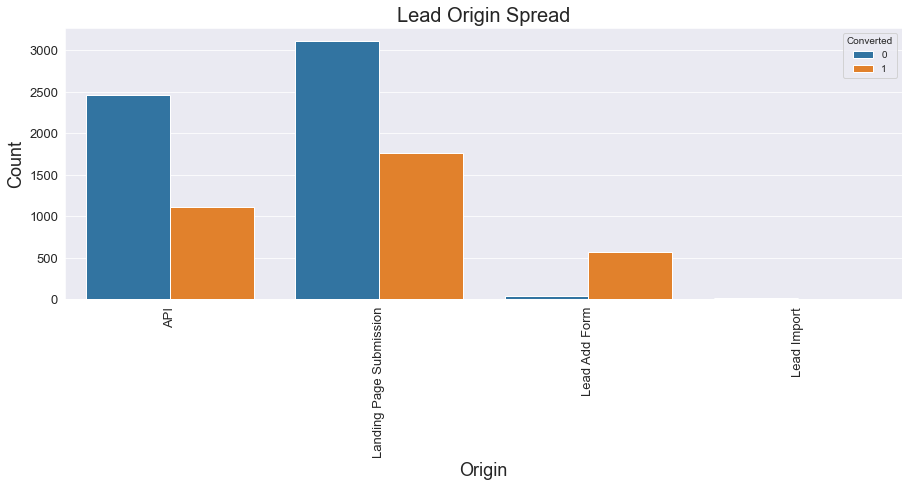

In [65]:
plt.figure(figsize=(15,5))
plt_obj=sns.countplot(lead_data['Lead Origin'], hue=lead_data.Converted)
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)

plt.yticks(fontsize=13)
plt.xlabel('Origin',fontsize = 18)
plt.ylabel('Count',fontsize = 18)
plt.title('Lead Origin Spread',fontsize=20)

plt.show()

1. API and Landing Page Submission bring higher number of leads as well as conversion.
2. Lead Add Form has a very high conversion rate but count of leads are not very high.
3. Lead Import Form get very few leads.
4. In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and increase number of lead add form as they have higher conversion rate.

## Analysing "Last Notable Activity variable" column

In [66]:
lead_data['Last Notable Activity'].value_counts(dropna=False,normalize=True)*100


Modified                        35.922223
Email Opened                    31.055696
SMS Sent                        23.860266
Page Visited on Website          3.493354
Olark Chat Conversation          2.010326
Email Link Clicked               1.900472
Email Bounced                    0.659123
Unsubscribed                     0.516313
Unreachable                      0.351532
Had a Phone Conversation         0.153795
Email Marked Spam                0.021971
Resubscribed to emails           0.010985
Form Submitted on Website        0.010985
Approached upfront               0.010985
Email Received                   0.010985
View in browser link Clicked     0.010985
Name: Last Notable Activity, dtype: float64

__we have a lot of values with very few occurance so we will group all these into one category__

In [67]:
lowFreqData = lead_data['Last Notable Activity'].value_counts(normalize=True,dropna=False)*100
lowFreqData = lowFreqData.where(lowFreqData<1).dropna().index.to_list()
lowFreqData

['Email Bounced',
 'Unsubscribed',
 'Unreachable',
 'Had a Phone Conversation',
 'Email Marked Spam',
 'Resubscribed to emails',
 'Form Submitted on Website',
 'Approached upfront',
 'Email Received',
 'View in browser link Clicked']

In [68]:
lead_data['Last Notable Activity'].replace(lowFreqData,'Others',inplace=True)

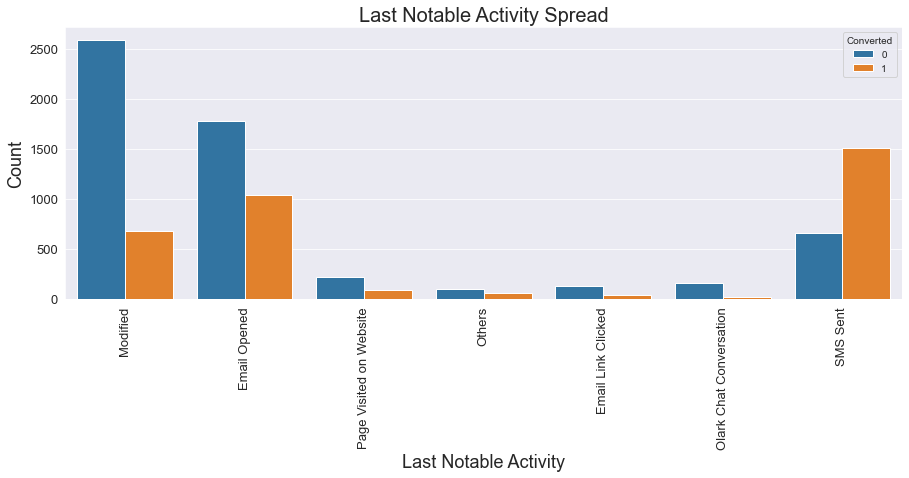

In [69]:
plt.figure(figsize=(15,5))
plt_obj=sns.countplot(lead_data['Last Notable Activity'], hue=lead_data.Converted)
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)

plt.yticks(fontsize=13)
plt.xlabel('Last Notable Activity',fontsize = 18)
plt.ylabel('Count',fontsize = 18)
plt.title('Last Notable Activity Spread',fontsize=20)

plt.show()

- Students that are reverting to the sms are highly possible to become a converted lead


## Analysing "Do Not Email" column

In [70]:
lead_data['Do Not Email'].value_counts(dropna=False,normalize=True)*100


No     92.046578
Yes     7.953422
Name: Do Not Email, dtype: float64

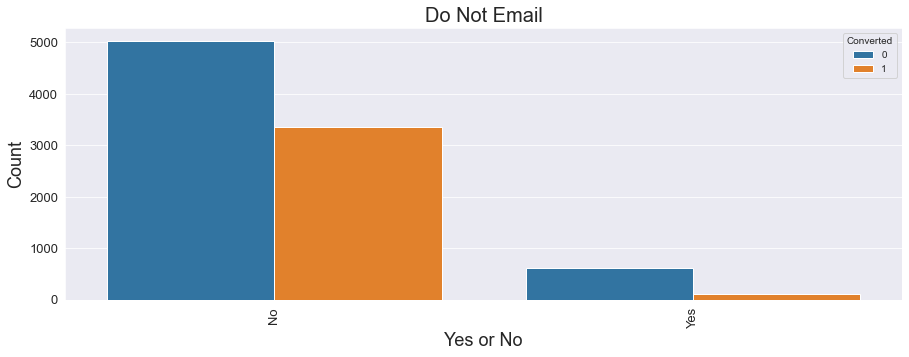

In [71]:


plt.figure(figsize=(15,5))
plt_obj=sns.countplot(lead_data['Do Not Email'], hue=lead_data.Converted)
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)

plt.yticks(fontsize=13)
plt.xlabel('Yes or No',fontsize = 18)
plt.ylabel('Count',fontsize = 18)
plt.title('Do Not Email',fontsize=20)

plt.show()

### Checking correlation between numerical variable

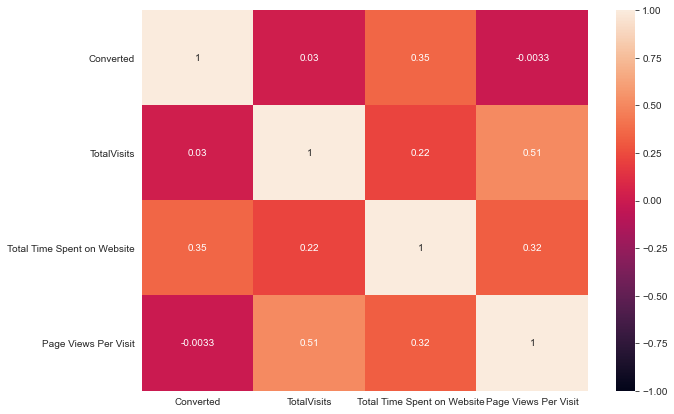

In [72]:
plt.figure(figsize = (10,7))
sns.heatmap(lead_data.corr(),annot=True,vmin=-1,
    vmax=1)
plt.show()

__We don't have any high correlation so that's good__

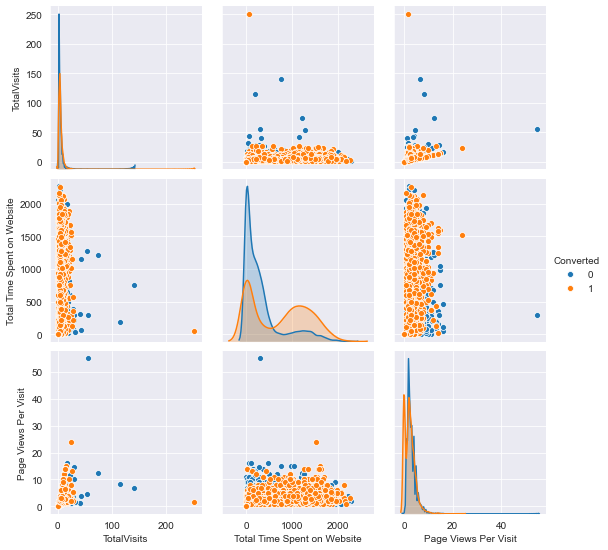

In [73]:

sns.pairplot(lead_data,hue='Converted')
plt.show()

### Box Plot

In [74]:
num_columns = lead_data.loc[:, lead_data.dtypes != 'object'].columns
num_columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

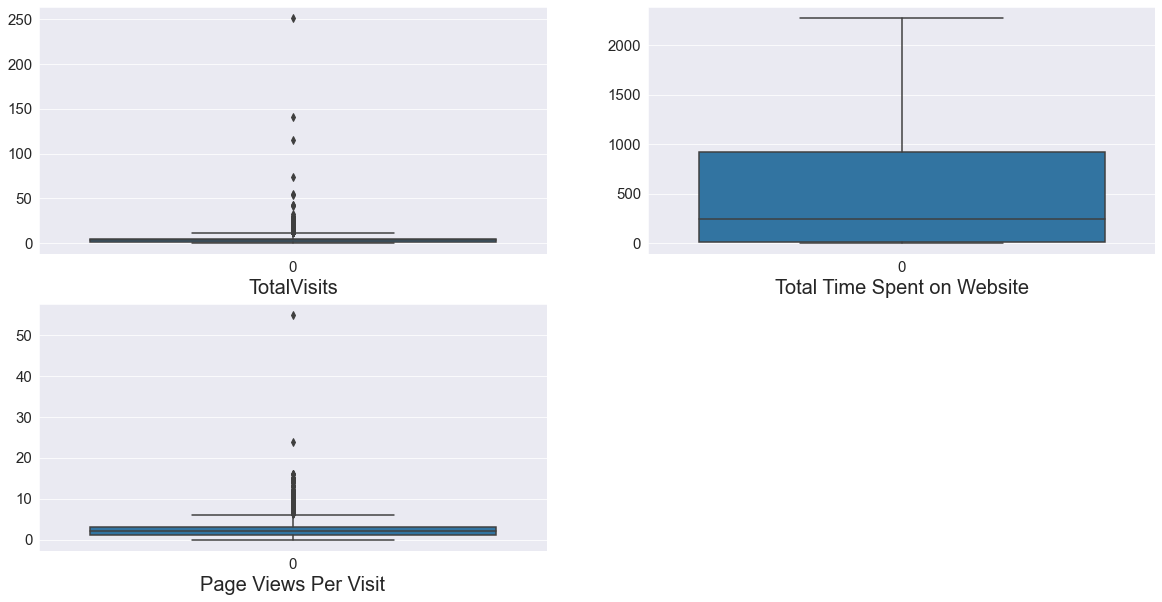

In [75]:
plt.figure(figsize=(20,10))
for i in range(len(num_columns)):
    if num_columns[i]=='Converted':
        continue
    plt.subplot(2,2,i)
    # plt.subplot(1,1)
    sns.boxplot(data = lead_data[num_columns[i]])
    plt.xlabel(num_columns[i],fontdict={'fontsize':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.show()

In [76]:
##### Checking quantiles
lead_data.describe(percentiles=[0.01,.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
90%,1.000000,7.000000,1372.000000,5.000000
95%,1.000000,10.000000,1556.900000,6.000000


__there is a huge jump in our data from 99 percentile to 100 percentile for TotalVisits so we will remove the last 1% of the data__

In [77]:
lastQuantile = lead_data['TotalVisits'].quantile(0.99)

lead_data = lead_data[(lead_data['TotalVisits'] <= lastQuantile)]

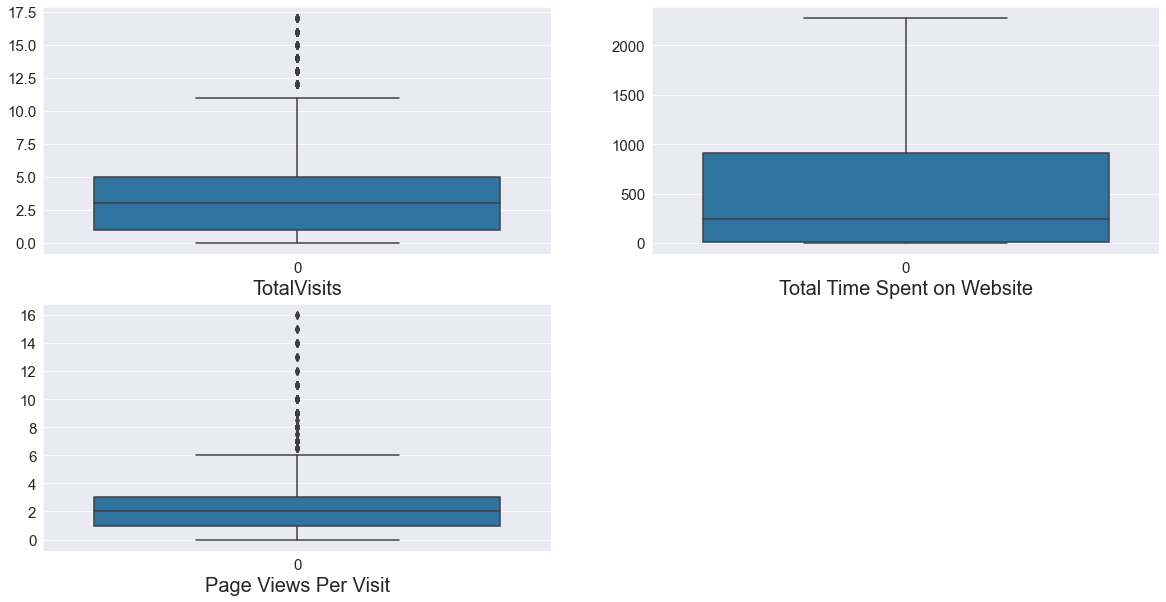

In [78]:
plt.figure(figsize=(20,10))
for i in range(len(num_columns)):
    if num_columns[i]=='Converted':
        continue
    plt.subplot(2,2,i)
    # plt.subplot(1,1)
    sns.boxplot(data = lead_data[num_columns[i]])
    plt.xlabel(num_columns[i],fontdict={'fontsize':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.show()

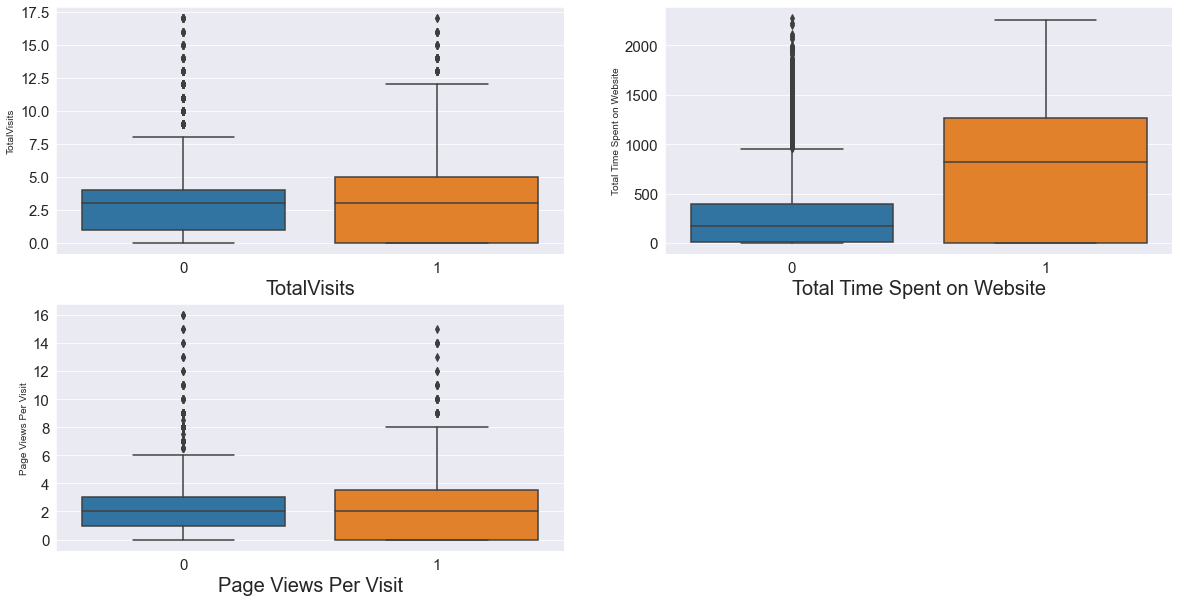

In [79]:
plt.figure(figsize=(20,10))
for i in range(len(num_columns)):
    if num_columns[i]=='Converted':
        continue
    plt.subplot(2,2,i)
    # plt.subplot(1,1)
    sns.boxplot( data = lead_data,x = 'Converted', y=num_columns[i])
    plt.xlabel(num_columns[i],fontdict={'fontsize':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.show()

- Leads spending more time on the website are more likely to be converted.
- Median of TotalVisits and Page Views per visit is same for converted and non-converted

In [80]:
calc_null(lead_data)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

__No null values in our data__

### Dummy variable creation

In [81]:
#Checking columns that have only 2 unique values so that they can be mapped into 0 and 1
lead_data.nunique()==2

Lead Origin                               False
Lead Source                               False
Do Not Email                               True
Converted                                  True
TotalVisits                               False
Total Time Spent on Website               False
Page Views Per Visit                      False
Last Activity                             False
Specialization                            False
What is your current occupation           False
Tags                                      False
City                                      False
A free copy of Mastering The Interview     True
Last Notable Activity                     False
dtype: bool

In [82]:
lead_data[['Do Not Email','A free copy of Mastering The Interview']].head()

,Do Not Email,A free copy of Mastering The Interview
0,No,No
1,No,No
2,No,Yes
3,No,No
4,No,No


In [83]:
#Converting yes and no to 1 & 0
lead_data[['Do Not Email','A free copy of Mastering The Interview']] = lead_data[['Do Not Email','A free copy of Mastering The Interview']].replace(['Yes','No'],[1,0])


In [84]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9020 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9020 non-null   object 
 1   Lead Source                             9020 non-null   object 
 2   Do Not Email                            9020 non-null   int64  
 3   Converted                               9020 non-null   int64  
 4   TotalVisits                             9020 non-null   float64
 5   Total Time Spent on Website             9020 non-null   int64  
 6   Page Views Per Visit                    9020 non-null   float64
 7   Last Activity                           9020 non-null   object 
 8   Specialization                          9020 non-null   object 
 9   What is your current occupation         9020 non-null   object 
 10  Tags                                    9020 non-null   obje

In [85]:
#Getting categorical variable for dummy creation
cat_columns = lead_data.loc[:, lead_data.dtypes == 'object'].columns
cat_columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [86]:
for i in cat_columns:
    print(lead_data[i].value_counts(),end='\n\n\n')

Landing Page Submission    4820
API                        3562
Lead Add Form               607
Lead Import                  31
Name: Lead Origin, dtype: int64


Google              2855
Direct Traffic      2512
Olark Chat          1751
Organic Search      1125
Reference            442
Welingak Website     129
Referral Sites       123
Social Media          33
Not Available         29
Others                21
Name: Lead Source, dtype: int64


Email Opened                 3415
SMS Sent                     2722
Olark Chat Conversation       970
Page Visited on Website       602
Converted to Lead             428
Email Bounced                 311
Email Link Clicked            266
Others                        191
Form Submitted on Website     115
Name: Last Activity, dtype: int64


Specializations_In_Management        4161
Not Available                        3293
Business Administration               393
Banking, Investment And Insurance     327
Media and Advertising                 199
Tr

In [87]:
dummy = pd.get_dummies(lead_data[cat_columns], drop_first=True)

#Dropping variable that represents unavailable data
selectCols = [col for col in dummy.columns if '_Not Available' not in col ]
#Dummy[selectCols]
#selectCols = [col for col in selectCols if '_Others' not in col ]
dummy = dummy[selectCols]

In [88]:
dummy.shape

(9020, 48)

In [89]:
cat_columns = lead_data.loc[:, lead_data.dtypes == 'object'].columns
cat_columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [90]:
lead_data = pd.concat([lead_data,dummy],1)

In [91]:
#### droping original columns as dummy data has been assigned to the dataframe
lead_data.drop(cat_columns,1,inplace=True)

In [92]:
lead_data.shape

(9020, 54)

In [93]:
calc_null(lead_data)

Do Not Email                                            0.0
Converted                                               0.0
TotalVisits                                             0.0
Total Time Spent on Website                             0.0
Page Views Per Visit                                    0.0
A free copy of Mastering The Interview                  0.0
Lead Origin_Landing Page Submission                     0.0
Lead Origin_Lead Add Form                               0.0
Lead Origin_Lead Import                                 0.0
Lead Source_Google                                      0.0
Lead Source_Olark Chat                                  0.0
Lead Source_Organic Search                              0.0
Lead Source_Others                                      0.0
Lead Source_Reference                                   0.0
Lead Source_Referral Sites                              0.0
Lead Source_Social Media                                0.0
Lead Source_Welingak Website            

__No null values present in the data__

In [94]:
lead_data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Specializations_In_Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


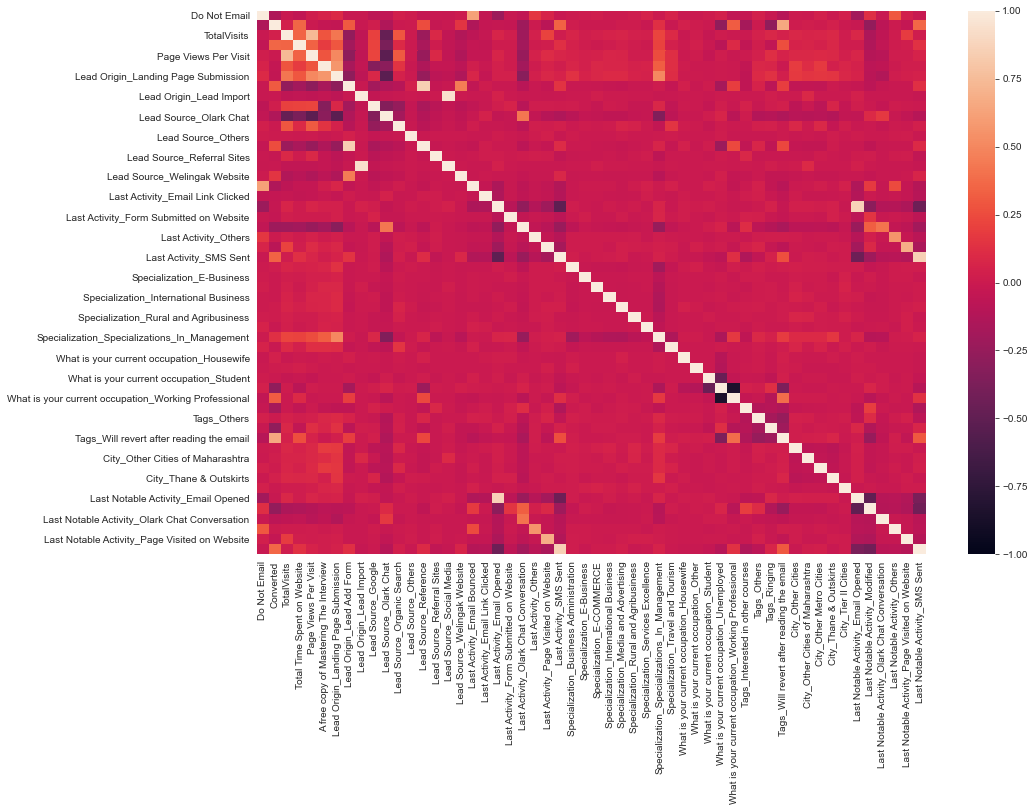

In [95]:
plt.figure(figsize = (15,10))
sns.heatmap(lead_data.corr(),annot=False,vmin=-1,
    vmax=1)
plt.show()

## Model Building

In [96]:
Y = lead_data['Converted']
X=lead_data.drop('Converted', axis=1)

#### Test Train splitting

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)


In [98]:
X_train.info(max_cols=105)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6314 entries, 2873 to 5783
Data columns (total 53 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6314 non-null   int64  
 1   TotalVisits                                           6314 non-null   float64
 2   Total Time Spent on Website                           6314 non-null   int64  
 3   Page Views Per Visit                                  6314 non-null   float64
 4   A free copy of Mastering The Interview                6314 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6314 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6314 non-null   uint8  
 7   Lead Origin_Lead Import                               6314 non-null   uint8  
 8   Lead Source_Google                                    6

#### Scaling the data

In [99]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Specializations_In_Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2873,0,0.271781,0.031598,0.814423,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
6823,0,1.276480,2.389158,2.274024,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
7258,0,-1.067817,-0.874028,-1.131710,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8327,0,1.611379,1.982176,0.167334,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
5940,1,-0.732918,-0.701703,-0.645177,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


#### Model creation

In [100]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, Y_train)

In [101]:
rfe.support_.sum()

15

In [102]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('A free copy of Mastering The Interview', False, 31),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 20),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Others', False, 30),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Social Media', False, 27),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 39),
 ('Last Activity_Email Link Clicked', False, 14),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 11),
 ('Last Activity_Olark Chat Conversation', False, 7),
 ('Last Activity_Others', False, 4),
 ('Last Activity_Page Visited on Website', False, 28),
 ('Last Ac

In [103]:
 X_train.columns[rfe.support_]

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [104]:
#list of RFE supported columns
selected_col = X_train.columns[rfe.support_]
len(selected_col)


15

In [105]:
##### filtering data to use RFE selected columns
X_train = X_train[selected_col]


In [106]:
X_train.shape

(6314, 15)

In [107]:
Y_train = Y_train.values

In [108]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1675.2
Date:                Mon, 23 Nov 2020   Deviance:                       3350.3
Time:                        17:00:10   Pearson chi2:                 1.12e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6073      0.110    -23.743      0.000      -2.822      -2.392
Do Not Email                                            -1.4487      0.241     -6.010      0.000      -1.921      -0.976
Total Time Spent on Website                              1.1376      0.052     21.891      0.000       1.036       1.239
Lead Origin_Lead Add Form                                2.9475      0.841      3.505      0.000       1.299       4.596
Lead Source_Olark Chat                                   1.2209      0.127      9.602      0.000       0.972       1.470
Lead Source_Reference                                    1.2497      0.883      1.415      0.157      -0.482       2.981
Lead Source_Welingak Website                             3.1155      1.106      2.816      0.005       0.947       5.284
Last Activity_Email Opened                               0.9851      0.115      8.540      0.000       0.759       1.211
Last Activity_SMS Sent                                   1.2079      0.182      6.626      0.000       0.851       1.565
What is your current occupation_Housewife               21.9440   1.47e+04      0.001      0.999   -2.87e+04    2.88e+04
What is your current occupation_Working Professional     1.6855      0.267      6.319      0.000       1.163       2.208
Tags_Interested in other courses                        -2.5458      0.379     -6.710      0.000      -3.289      -1.802
Tags_Ringing                                            -3.5224      0.248    -14.190      0.000      -4.009      -3.036
Tags_Will revert after reading the email                 3.9987      0.177     22.561      0.000       3.651       4.346
Last Notable Activity_Others                             1.6695      0.409      4.082      0.000       0.868       2.471
Last Notable Activity_SMS Sent                           1.5539      0.183      8.491      0.000       1.195       1.913
========================================================================================================================
"""

In [109]:
##### VIF function
def vif_info():
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [110]:
vif_info()

,Features,VIF
2,Lead Origin_Lead Add Form,17.55
4,Lead Source_Reference,13.46
7,Last Activity_SMS Sent,4.93
5,Lead Source_Welingak Website,4.89
14,Last Notable Activity_SMS Sent,4.86
12,Tags_Will revert after reading the email,1.87
1,Total Time Spent on Website,1.40
6,Last Activity_Email Opened,1.38
3,Lead Source_Olark Chat,1.34
9,What is your current occupation_Working Profes...,1.29


In [111]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [112]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1678.2
Date:                Mon, 23 Nov 2020   Deviance:                       3356.5
Time:                        17:00:11   Pearson chi2:                 1.12e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6047      0.110    -23.732      0.000      -2.820      -2.390
Do Not Email                                            -1.4496      0.241     -6.013      0.000      -1.922      -0.977
Total Time Spent on Website                              1.1374      0.052     21.898      0.000       1.036       1.239
Lead Origin_Lead Add Form                                2.9425      0.841      3.500      0.000       1.295       4.590
Lead Source_Olark Chat                                   1.2155      0.127      9.568      0.000       0.966       1.464
Lead Source_Reference                                    1.2625      0.883      1.430      0.153      -0.468       2.993
Lead Source_Welingak Website                             3.1159      1.106      2.817      0.005       0.948       5.284
Last Activity_Email Opened                               0.9918      0.115      8.604      0.000       0.766       1.218
Last Activity_SMS Sent                                   1.2061      0.182      6.616      0.000       0.849       1.563
What is your current occupation_Working Professional     1.6788      0.267      6.292      0.000       1.156       2.202
Tags_Interested in other courses                        -2.5494      0.379     -6.720      0.000      -3.293      -1.806
Tags_Ringing                                            -3.5254      0.248    -14.203      0.000      -4.012      -3.039
Tags_Will revert after reading the email                 4.0040      0.177     22.597      0.000       3.657       4.351
Last Notable Activity_Others                             1.6686      0.409      4.079      0.000       0.867       2.470
Last Notable Activity_SMS Sent                           1.5543      0.183      8.492      0.000       1.196       1.913
========================================================================================================================
"""

In [113]:
vif_info()

,Features,VIF
2,Lead Origin_Lead Add Form,17.55
4,Lead Source_Reference,13.46
7,Last Activity_SMS Sent,4.93
5,Lead Source_Welingak Website,4.89
13,Last Notable Activity_SMS Sent,4.86
11,Tags_Will revert after reading the email,1.86
1,Total Time Spent on Website,1.40
6,Last Activity_Email Opened,1.37
3,Lead Source_Olark Chat,1.34
8,What is your current occupation_Working Profes...,1.29


In [114]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [115]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1679.1
Date:                Mon, 23 Nov 2020   Deviance:                       3358.2
Time:                        17:00:11   Pearson chi2:                 1.09e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6001      0.110    -23.727      0.000      -2.815      -2.385
Do Not Email                                            -1.4624      0.242     -6.043      0.000      -1.937      -0.988
Total Time Spent on Website                              1.1363      0.052     21.882      0.000       1.035       1.238
Lead Origin_Lead Add Form                                4.1063      0.278     14.761      0.000       3.561       4.651
Lead Source_Olark Chat                                   1.2120      0.127      9.539      0.000       0.963       1.461
Lead Source_Welingak Website                             1.9522      0.770      2.534      0.011       0.442       3.462
Last Activity_Email Opened                               0.9875      0.115      8.580      0.000       0.762       1.213
Last Activity_SMS Sent                                   1.2004      0.182      6.588      0.000       0.843       1.558
What is your current occupation_Working Professional     1.6878      0.266      6.343      0.000       1.166       2.209
Tags_Interested in other courses                        -2.5447      0.379     -6.721      0.000      -3.287      -1.803
Tags_Ringing                                            -3.5155      0.247    -14.222      0.000      -4.000      -3.031
Tags_Will revert after reading the email                 4.0010      0.177     22.585      0.000       3.654       4.348
Last Notable Activity_Others                             1.6681      0.410      4.064      0.000       0.864       2.472
Last Notable Activity_SMS Sent                           1.5551      0.183      8.492      0.000       1.196       1.914
========================================================================================================================
"""

In [116]:
vif_info()

,Features,VIF
6,Last Activity_SMS Sent,4.93
12,Last Notable Activity_SMS Sent,4.86
10,Tags_Will revert after reading the email,1.86
2,Lead Origin_Lead Add Form,1.64
1,Total Time Spent on Website,1.40
5,Last Activity_Email Opened,1.37
3,Lead Source_Olark Chat,1.34
4,Lead Source_Welingak Website,1.34
7,What is your current occupation_Working Profes...,1.28
9,Tags_Ringing,1.24


__We have a good model for now but still we will try to redue multi collinierty__

In [117]:
X_train.drop('Last Activity_SMS Sent', axis = 1, inplace = True)
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1699.8
Date:                Mon, 23 Nov 2020   Deviance:                       3399.6
Time:                        17:00:11   Pearson chi2:                 1.08e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3034      0.095    -24.253      0.000      -2.490      -2.117
Do Not Email                                            -1.4811      0.238     -6.225      0.000      -1.947      -1.015
Total Time Spent on Website                              1.1338      0.052     21.959      0.000       1.033       1.235
Lead Origin_Lead Add Form                                4.1431      0.277     14.975      0.000       3.601       4.685
Lead Source_Olark Chat                                   1.1273      0.125      9.001      0.000       0.882       1.373
Lead Source_Welingak Website                             2.1715      0.776      2.800      0.005       0.652       3.691
Last Activity_Email Opened                               0.7127      0.104      6.875      0.000       0.510       0.916
What is your current occupation_Working Professional     1.6795      0.265      6.346      0.000       1.161       2.198
Tags_Interested in other courses                        -2.5925      0.378     -6.867      0.000      -3.332      -1.853
Tags_Ringing                                            -3.5108      0.248    -14.160      0.000      -3.997      -3.025
Tags_Will revert after reading the email                 3.9719      0.175     22.701      0.000       3.629       4.315
Last Notable Activity_Others                             1.4024      0.406      3.457      0.001       0.607       2.198
Last Notable Activity_SMS Sent                           2.4737      0.127     19.443      0.000       2.224       2.723
========================================================================================================================
"""

In [118]:
vif_info()

,Features,VIF
9,Tags_Will revert after reading the email,1.85
2,Lead Origin_Lead Add Form,1.63
11,Last Notable Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.40
5,Last Activity_Email Opened,1.36
4,Lead Source_Welingak Website,1.34
3,Lead Source_Olark Chat,1.33
6,What is your current occupation_Working Profes...,1.28
8,Tags_Ringing,1.22
0,Do Not Email,1.16


__Now all the VIF values are less than 2% so we are good to move ahead__

In [119]:
X_train.shape

(6314, 12)

In [120]:
#Predicting the values using the trained model
Y_train_pred = res.predict(sm.add_constant(X_train))
Y_train_pred.head()

2873    0.531125
6823    0.998943
7258    0.102749
8327    0.980468
5940    0.010151
dtype: float64

In [121]:
#Reshaping series into array

Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.5311247 , 0.99894287, 0.10274888, 0.98046788, 0.01015057,
       0.9980621 , 0.6114157 , 0.00611308, 0.96234721, 0.05833077])

In [122]:
Y_train_pred_final = pd.DataFrame({'Converted':Y_train, 'Conversion_Prob':Y_train_pred})
Y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.531125
1,1,0.998943
2,0,0.102749
3,1,0.980468
4,0,0.010151


In [123]:
#Using the cut-off as 50%
Y_train_pred_final['Predicted'] = Y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
Y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.531125,1
1,1,0.998943,1
2,0,0.102749,0
3,1,0.980468,1
4,0,0.010151,0


In [124]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()


In [125]:
fpr, tpr, thresholds = metrics.roc_curve( Y_train_pred_final.Converted, Y_train_pred_final.Conversion_Prob, drop_intermediate = False )

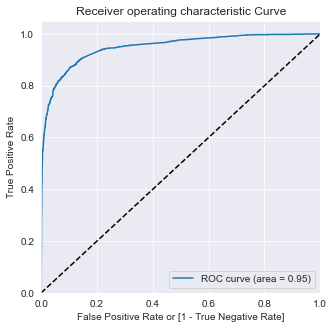

In [126]:
# Call the ROC function

draw_roc(Y_train_pred_final.Converted, Y_train_pred_final.Conversion_Prob)

Area under the ROC curve is 0.95 so we have pretty good model

#### Getting optimal cutoff value

In [127]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i]= Y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.531125,1,1,1,1,1,1,1,0,0,0,0
1,1,0.998943,1,1,1,1,1,1,1,1,1,1,1
2,0,0.102749,0,1,1,0,0,0,0,0,0,0,0
3,1,0.980468,1,1,1,1,1,1,1,1,1,1,1
4,0,0.010151,0,1,0,0,0,0,0,0,0,0,0


In [128]:


cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376465  1.000000  0.000000
0.1   0.1  0.713494  0.967186  0.560325
0.2   0.2  0.873456  0.905343  0.854204
0.3   0.3  0.879157  0.880522  0.878334
0.4   0.4  0.888343  0.844342  0.914910
0.5   0.5  0.892778  0.810265  0.942596
0.6   0.6  0.884384  0.754733  0.962662
0.7   0.7  0.880108  0.723601  0.974600
0.8   0.8  0.868546  0.681111  0.981712
0.9   0.9  0.841939  0.594867  0.991110


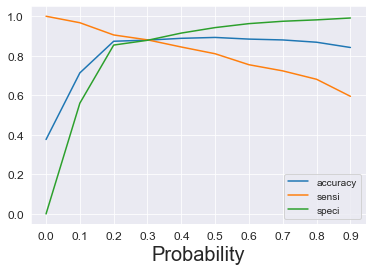

In [129]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xlabel('Probability',fontdict={'fontsize':20})
plt.xticks(num,
           fontsize=12)
plt.yticks(fontsize=12)
plt.show()

__0.3 seems to be cutoff prob so all the values above 3 will convert and all below will not__

In [130]:
Y_train_pred_final['final_predicted'] = Y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

Y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.531125,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.998943,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.102749,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.980468,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.010151,0,1,0,0,0,0,0,0,0,0,0,0


#### Accuracy

In [131]:
# Let's check the accuracy now

metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)

0.8791574279379157

In [132]:
# Let's create the confusion matrix once again

confusion_mattrix = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted )
confusion_mattrix

array([[3458,  479],
       [ 284, 2093]], dtype=int64)

In [133]:
# Let's evaluate the other metrics as well

TP = confusion_mattrix[1,1] # true positive 
TN = confusion_mattrix[0,0] # true negatives
FP = confusion_mattrix[0,1] # false positives
FN = confusion_mattrix[1,0] # false negatives

#### Sensitivy

In [134]:
# Calculate Sensitivity

TP/(TP+FN)

0.8805216659655027

#### Specificity

In [135]:
# Calculate Specificity

TN/(TN+FP)

0.8783337566675133

#### False Postive Rate

In [136]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))


0.12166624333248667


#### Positive predictive value

In [137]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8137636080870918


#### Negative predictive value

In [138]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9241047568145376


In [139]:
confusion_mattrix

array([[3458,  479],
       [ 284, 2093]], dtype=int64)

#### Precision

In [140]:
##### Precision
print (TP / float(TP+FP))

0.8137636080870918


In [141]:
precision_score(Y_train_pred_final.Converted , Y_train_pred_final.final_predicted)

0.8137636080870918

#### Recall

In [142]:
##### Recall
print (TP / float(TP+ FN))

0.8805216659655027


In [143]:
recall_score(Y_train_pred_final.Converted , Y_train_pred_final.final_predicted)

0.8805216659655027

#### Precision and recall tradeoff

In [144]:
Y_train_pred_final.Converted, Y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(Y_train_pred_final.Converted, Y_train_pred_final.Conversion_Prob)

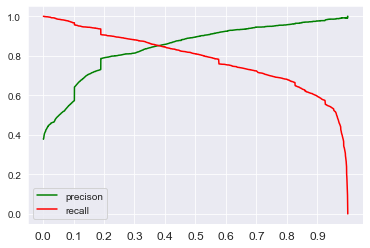

In [145]:
plt.plot(thresholds, p[:-1], "g-",label='precison')
plt.plot(thresholds, r[:-1], "r-",label='recall')
plt.legend()
plt.xticks(num,
           fontsize=12)
plt.show()

### Some key takeaways using train dataset

- Accuracy : __87.91%__
- Sensitivity : __88.05%__
- Specificity : __87.83%__
- Precision : __81.37%__

### Testing model using test dataset

In [146]:
#### scaling test data

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Specializations_In_Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5130,1,-1.067817,-0.874028,-1.131710,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6929,0,0.606681,-0.820864,1.300957,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1484,1,0.271781,-0.644872,0.814423,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
6519,0,-0.398018,2.024341,-0.158643,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
7472,0,-0.398018,1.666857,-0.158643,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [147]:
X_test = X_test[X_train.columns]

In [148]:
X_test.shape

(2706, 12)

In [149]:
##### Predicting prob conversion

Y_test_pred = res.predict(sm.add_constant(X_test))
Y_test_pred = Y_test_pred.values.reshape(-1)
Y_test_pred[:10]

array([2.53790059e-02, 7.43773942e-02, 3.26627365e-04, 2.60146713e-01,
       9.97605537e-01, 1.02282101e-01, 1.02748881e-01, 1.02748881e-01,
       1.13078108e-01, 9.95904893e-01])

In [150]:
Y_test_pred_final = pd.DataFrame({'Converted':Y_test, 'Conversion_Prob':Y_test_pred})
Y_test_pred_final.head()

,Converted,Conversion_Prob
5130,0,0.025379
6929,0,0.074377
1484,0,0.000327
6519,0,0.260147
7472,1,0.997606


In [151]:
Y_test_pred_final['final_predicted'] = Y_test_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

Y_test_pred_final.head()

,Converted,Conversion_Prob,final_predicted
5130,0,0.025379,0
6929,0,0.074377,0
1484,0,0.000327,0
6519,0,0.260147,0
7472,1,0.997606,1


#### Accuracy

In [152]:

metrics.accuracy_score(Y_test_pred_final.Converted, Y_test_pred_final.final_predicted)

0.8787878787878788

In [153]:
confusion_mattrix_test = metrics.confusion_matrix(Y_test_pred_final.Converted, Y_test_pred_final.final_predicted )
confusion_mattrix_test

array([[1458,  200],
       [ 128,  920]], dtype=int64)

In [154]:
TP = confusion_mattrix_test[1,1] # true positive 
TN = confusion_mattrix_test[0,0] # true negatives
FP = confusion_mattrix_test[0,1] # false positives
FN = confusion_mattrix_test[1,0] # false negatives

#### Sensitivity

In [155]:
print('Sensitivity',TP/(TP+FN))

Sensitivity 0.8778625954198473


#### Specificity

In [156]:
print('Specificity',TN/(TN+FP))

Specificity 0.879372738238842


#### False Postive Rate

In [157]:
print('False Postive Rate',FP/ (TN+FP))

False Postive Rate 0.12062726176115803


#### Positive predictive value 

In [158]:
print ('Positive predictive value',TP / (TP+FP))

Positive predictive value 0.8214285714285714


#### Negative predictive value

In [159]:
print ('Negative predictive value',TN / (TN+ FN))

Negative predictive value 0.9192938209331651


#### Precision

In [160]:
precision_score(Y_test_pred_final.Converted , Y_test_pred_final.final_predicted)

0.8214285714285714

#### Recall

In [161]:

recall_score(Y_test_pred_final.Converted , Y_test_pred_final.final_predicted)

0.8778625954198473

### Some key takeaways using train dataset

- Accuracy : __87.87%__
- Sensitivity : __87.78%__
- Specificity : __87.93%__
- Precision : __82.14%__

### Comparison between train and test dataset values




___Train Dataset___

- Accuracy : __87.91%__
- Sensitivity : __88.05%__
- Specificity : __87.83%__
- Precision : __81.37%__





___Test Dataset___

- Accuracy : __87.87%__
- Sensitivity : __87.78%__
- Specificity : __87.93%__
- Precision : __82.14%__